# Assignment 6.1

Name: Isaack Karanja 
Date: Feb  17th, 2023

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit the assignment as a PDF file. Always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 6.1.

For the Scottish hill `Races` data, a linear model can predict men’s record times from women’s record times.  
http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat


In [39]:
import numpy as np
import statistics # use for mean and standard deviation functions
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import cauchy
from statsmodels.stats.proportion import proportion_confint
import statsmodels.formula.api as smf
import pymc3
from scipy.stats import beta
import arviz as az
from scipy.stats import uniform
import statsmodels.formula.api as sm
from statsmodels.stats.proportion import proportions_ztest
from matplotlib import gridspec
import math
import seaborn as sns

(a) Show the scatterplot and report the prediction equation. Predict the men’s record time for the Highland Fling, for which timeW = 490.05 minutes.

`Your answer goes here`

In [104]:
# Read in the Scott Races data file

scottraces = pd.read_csv('https://stat4ds.rwth-aachen.de/data/ScotsRaces.dat', sep='\s+')
print(scottraces['race'].value_counts())

AnTeallach         1
KnockCrieff        1
MaddyMoss          1
LomondsofFife      1
LochLochyMunros    1
                  ..
DonardCommedagh    1
Durisdeer          1
EildonTwo          1
FeelTheBurns       1
Yetholm            1
Name: race, Length: 68, dtype: int64


In [115]:
scottraces_clean = scottraces.drop(['race'], axis=1) #Create a matrix and drop WomenTime and RaceName columns 
scottraces_clean.head()

,distance,climb,timeM,timeW
0,10.6,1.062,74.68,89.72
1,25.0,2.400,187.32,222.03
2,16.4,0.650,87.18,102.48
3,10.2,0.260,41.58,52.52
4,12.0,0.240,47.75,58.78


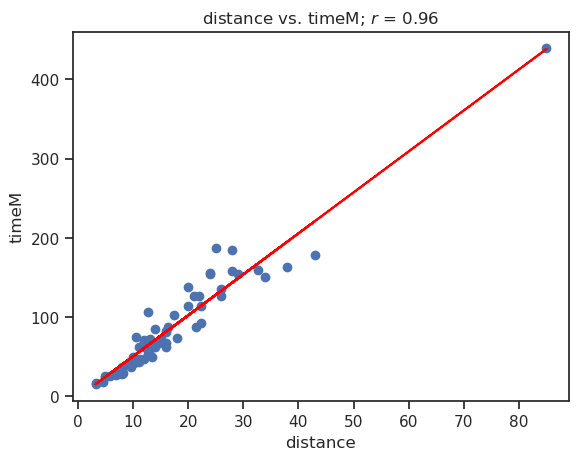

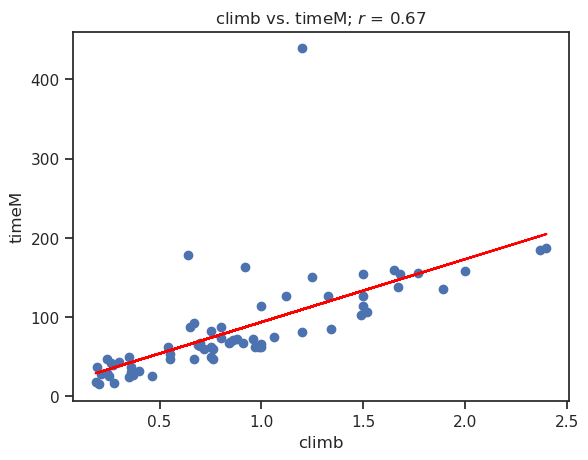

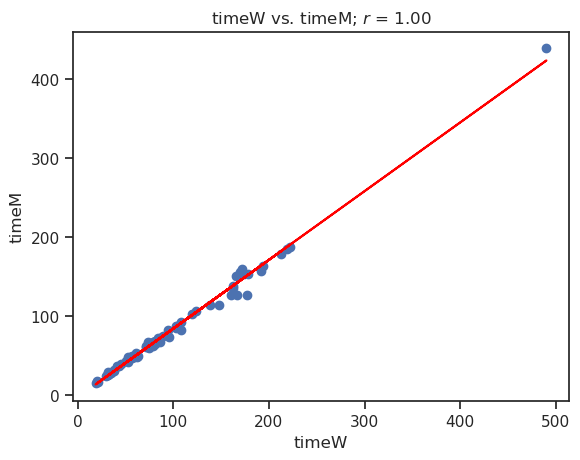

In [116]:
y_col = 'timeM'

x_columns = ['distance', 'climb','timeW']

for x_col in x_columns:
    figure = plt.figure()
    ax = plt.gca()
    m, b = np.polyfit(scottraces_clean[x_col], scottraces_clean[y_col], 1)
    plt.plot(scottraces_clean[x_col], m*scottraces_clean[x_col]+b, color = 'red')
    ax.scatter(scottraces_clean[x_col], scottraces_clean[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    corr = round(np.corrcoef(scottraces_clean[x_col], scottraces_clean[y_col])[0,1],2) 
    ax.set_title('{} vs. {};'.format(x_col, y_col) 
                 + ' $\mathit{r}$ = ' 
                 + '{:.2f}'.format(corr))
    plt.show()

In [117]:
# Predict the men’s record time for the Highland Fling, for which timeW = 490.05 minutes.
# Create a fit with distance and time
fitd = smf.ols(formula='timeM ~ distance + climb + timeW', data=scottraces).fit()
print(fitd.summary()) # edited output
print(fitd.params) # just the parameter estimates of the above fitted model:

                            OLS Regression Results                            
Dep. Variable:                  timeM   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3237.
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           8.34e-70
Time:                        18:09:57   Log-Likelihood:                -207.25
No. Observations:                  68   AIC:                             422.5
Df Residuals:                      64   BIC:                             431.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8797      1.472     -3.314      0.0

**Report the prediction equation**
* Linear Regression
$y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n} + \varepsilon$  
$y = -4.88 + 0.92({distance}) + 3.07({climb}) + 0.71({timeW}) +\varepsilon$  

In [118]:
## Predict the Highland Fling climb, for which timeW = 490.05 minutes.
scottraces_HighlandFling = scottraces.loc[scottraces["timeW"]  > 490 ]
scottraces_HighlandFling

,race,distance,climb,timeM,timeW
40,HighlandFling,85.0,1.2,439.15,490.05


In [119]:
fitd.predict({'distance': 85.0, 'climb': 1.2, 'timeW': 490.05}) #426.07 minutes

0    426.066666
dtype: float64

(b) Find and interpret the correlation.

`Your answer goes here`

In [123]:
print(scottraces_clean.corr())

          distance     climb     timeM     timeW
distance  1.000000  0.514471  0.962968  0.955549
climb     0.514471  1.000000  0.672009  0.685292
timeM     0.962968  0.672009  1.000000  0.995873
timeW     0.955549  0.685292  0.995873  1.000000


Distance and TimeM : Strong positive correlation  @0.962968  
Distance and TimeW : Strong positive correlation  @0.955549  
Distance and Climb : Positive correlation @0.514471  
Climb and TimeM : Positive correlation @0.672009  
Climb and TimeW : Positive correlation 0.685292  

Positive corelation means if the one variable increases, the other increases  


(c) We could impose the natural constraint that when timeW = 0, then timeM = 0. Fit the model $E(Y_i)=\beta x_i.$ Interpret the estimated slope.

`Your answer goes here`

In [128]:
# Create a fit with timeW = 0

scottraces_no_race = scottraces.drop(['race'], axis=1) #Create a matrix and drop WomenTime and RaceName columns 
scottraces_timeW_0 = scottraces_no_race.copy()
scottraces_timeW_0["timeW"] = 0
fitd = smf.ols(formula='timeM ~ distance + climb + timeW', data=scottraces_timeW_0).fit()
print(fitd.summary()) # edited output
print(fitd.params) # just the parameter estimates of the above fitted model:

   distance  climb   timeM  timeW
0      10.6  1.062   74.68      0
1      25.0  2.400  187.32      0
2      16.4  0.650   87.18      0
3      10.2  0.260   41.58      0
4      12.0  0.240   47.75      0
                            OLS Regression Results                            
Dep. Variable:                  timeM   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1041.
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           4.36e-50
Time:                        18:19:05   Log-Likelihood:                -259.33
No. Observations:                  68   AIC:                             524.7
Df Residuals:                      65   BIC:                             531.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
      

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


**Straight Line, with slope**
* Linear Regression
$y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n} + \varepsilon$  
$y = -15.26 + 4.5({distance}) + 28.3({climb}) +  \varepsilon$  

In [184]:
# Create a fit with timeM = 0

scottraces_no_race = scottraces.drop(['race'], axis=1) #Create a matrix and drop WomenTime and RaceName columns 
scottraces_timeW_0 = scottraces_no_race.copy()
scottraces_timeW_0["timeM"] = 0
fitd = smf.ols(formula='timeW ~ distance + climb + timeM', data=scottraces_timeW_0).fit()
# edited output
print(fitd.params) # just the parameter estimates of the above fitted model:

Intercept   -14.599650
distance      5.036178
climb        35.560975
timeM         0.000000
dtype: float64


**Straight Line fit**
* Linear Regression
$y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n} + \varepsilon$  
$y = -14.60 + 5.04({distance}) + 35.56({climb}) +  \varepsilon$  

## Problem 6.2.

For advanced industrialized nations, the Firearms data file at the text website shows annual homicide rates (per million population) and the number of firearms (per 100 people), with data taken from Wikipedia and [smallarmssurvey.org](smallarmssurvey.org).

(a) Construct a scatterplot and highlight any observations that fall apart from the general trend.

`Your answer goes here`

In [166]:
# Read in the Scott Races data file
firearms = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Firearms.dat', sep='\s+')
firearms.head()

,Nation,deaths,firearms
0,Austria,1.8,30
1,Belgium,2.9,17
2,Canada,5.1,31
3,Denmark,2.2,12
4,Finland,2.6,45


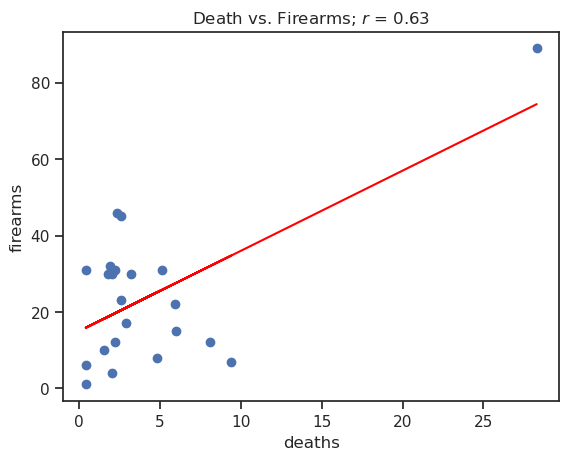

In [167]:
firearms_enc = firearms.drop(['Nation'], axis=1) #Create a matrix and drop the string Nation column
x = firearms_enc['deaths'] 
y = firearms_enc['firearms']
plt.title('firearms vs deaths')
plt.xlabel('deaths')       
plt.ylabel('firearms')           

# create best-fit line based on slope-intercept form
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y) 
plt.plot(x, m*x+b, color = 'red')

# correlation coefficient 
corr = round(np.corrcoef(x, y)[0,1],2)
plt.title('Death vs. Firearms;' ' $\mathit{r}$ = ' + "{:.2f}".format(corr))
plt.show()

One nation is an outlier in the number of firearms and corresponding number of deaths. There is a postive corelation between the number of firearms per 100K population and number of deaths. 

(b) Find the correlation with and without the outlying observation. Why is it so different in the two cases?

`Your answer goes here`

In [182]:
print(firearms_enc[firearms_enc['deaths'] > 20])


    deaths  firearms
21    28.3        89


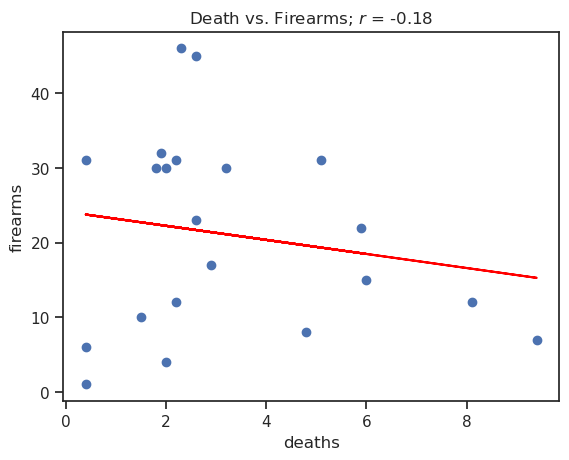

In [181]:
# Remove the outlier nation
firearms_wo_outlier = firearms_enc.copy() 
firearms_wo_outlier = firearms_wo_outlier[firearms_wo_outlier['deaths'] <= 20]


x_wo_outlier = firearms_wo_outlier['deaths'] 
y_wo_outlier = firearms_wo_outlier['firearms']
plt.title('firearms vs deaths')
plt.xlabel('deaths')       
plt.ylabel('firearms')           

# create best-fit line based on slope-intercept form
m_wo_outlier, b_wo_outlier = np.polyfit(x_wo_outlier, y_wo_outlier, 1)
plt.scatter(x_wo_outlier, y_wo_outlier) 
plt.plot(x_wo_outlier, m_wo_outlier*x_wo_outlier+b_wo_outlier, color = 'red')

# correlation coefficient 
corr = round(np.corrcoef(x_wo_outlier, y_wo_outlier)[0,1],2)
plt.title('Death vs. Firearms;' ' $\mathit{r}$ = ' + "{:.2f}".format(corr))
plt.show()

Once take out the outlier, we find that there is nagative correlation. And more firearms in a country does not nessary mean more deaths

(c) Fit the linear regression model with and without the outlying observation, and note how influential an outlier can be on the fit.

`Your answer goes here`

In [189]:
# Create a fit with outlier 

fitd = smf.ols(formula='deaths ~ firearms', data=firearms_enc).fit()
# edited output
print(fitd.summary()) #

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     13.47
Date:                Fri, 17 Feb 2023   Prob (F-statistic):            0.00152
Time:                        19:02:58   Log-Likelihood:                -63.932
No. Observations:                  22   AIC:                             131.9
Df Residuals:                      20   BIC:                             134.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2734      1.605     -0.170      0.8

In [191]:
# Create a fit WITHOUT outler

fitd = smf.ols(formula='deaths ~ firearms', data=firearms_wo_outlier).fit()
# edited output
print(fitd.summary()) #

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.6009
Date:                Fri, 17 Feb 2023   Prob (F-statistic):              0.448
Time:                        19:03:22   Log-Likelihood:                -47.798
No. Observations:                  21   AIC:                             99.60
Df Residuals:                      19   BIC:                             101.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9102      1.037      3.769      0.0

## Problem 6.5.

For the `Covid19` data file at the text website:  
http://stat4ds.rwth-aachen.de/data/Covid19.dat 

(a) Construct the two scatterplots shown in Figure 6.3.

`Your answer goes here`

In [193]:
# Read in the Covid Data file

covid19 = pd.read_csv('https://stat4ds.rwth-aachen.de/data/Covid19.dat', sep='\s+')
covid19.head()


,day,cases
0,1,16
1,2,24
2,3,30
3,4,53
4,5,80


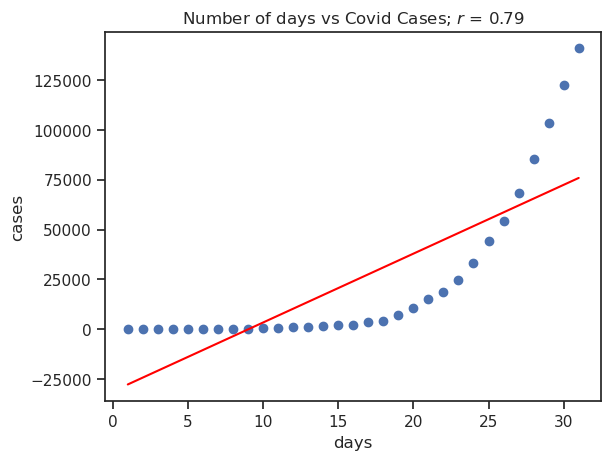

In [213]:
# Scatter plot of number of days vs covid cases

x_covid = covid19['day'] 
y_covid = covid19['cases']
plt.title('Number of days vs Covid Cases')
plt.xlabel('days')       
plt.ylabel('cases')           

# create best-fit line based on slope-intercept form
m_covid, b_covid = np.polyfit(x_covid, y_covid, 1)
plt.scatter(x_covid, y_covid) 

plt.plot(x_covid, m_covid*x_covid+b_covid, color = 'red')

# correlation coefficient 
corr = round(np.corrcoef(x_covid, y_covid)[0,1],2)
plt.title('Number of days vs Covid Cases;' ' $\mathit{r}$ = ' + "{:.2f}".format(corr))
plt.show()

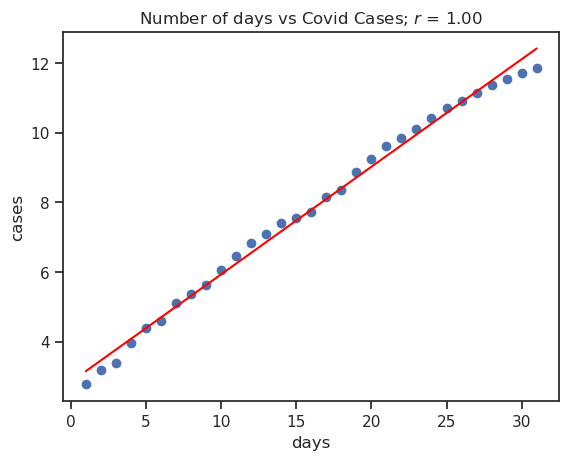

In [209]:
# Scatter plot of number of days vs covid cases

x_covid = covid19['day'] 
y_covid_log = np.log(covid19['cases'])
plt.title('Number of days vs Covid Cases')
plt.xlabel('days')       
plt.ylabel('cases')           

# create best-fit line based on slope-intercept form
m_covid, b_covid = np.polyfit(x_covid, y_covid_log, 1)
plt.scatter(x_covid, y_covid_log) 

plt.plot(x_covid, m_covid*x_covid+b_covid, color = 'red')

# correlation coefficient 
corr = round(np.corrcoef(x_covid, y_covid_log)[0,1],2)
plt.title('Number of days vs Covid Cases;' ' $\mathit{r}$ = ' + "{:.2f}".format(corr))
plt.show()



(b) Find and interpret the correlation between time and (i) cases, (ii) log(cases).

`Your answer goes here`

`(i) cases`  
We have a positive correlation at 0.79 between the number of days and number of covid cases

`(ii) cases`  
We have a strong positive correlation at 1.0 for number of cases and number of covid cases. The Linear model fits better when applied to $\{log(y_i)\}$

(c)  Fit the linear model for the log-transformed counts and report the prediction equation.$^{29}.$ Explain why the predicted count at day $x+1$ equals the predicted count at day $x$ multiplied by $\text{exp}(\hat\beta_1)=1.36.$

`Your answer goes here`

In [217]:
covid_log = covid19.copy()
covid_log['cases'] =  np.log(covid19['cases'])
fitd = smf.ols(formula='day ~ cases', data=covid_log).fit()
# edited output
print(fitd.summary()) #

                            OLS Regression Results                            
Dep. Variable:                    day   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4540.
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           2.02e-33
Time:                        19:25:11   Log-Likelihood:                -33.483
No. Observations:                  31   AIC:                             70.97
Df Residuals:                      29   BIC:                             73.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.0491      0.395    -22.931      0.0

## Problem 6.7.

For the model permitting interaction between distance and climb in their effect on women’s record times for the Scottish hill races, analyze whether any observation is influential in the least squares fit. How does the parameter estimate for the interaction term change when you analyze the data without it?

`Your answer goes here`

In [226]:
# Create a fit with timeW = 0

scottraces_women = scottraces.copy()
scottraces_women = scottraces_women.drop(['race', 'timeM'], axis=1) #Since we are only considering climb and distance create a matrix and drop timeM and RaceName columns 

In [227]:
print(scottraces_women.corr())

          distance     climb     timeW
distance  1.000000  0.514471  0.955549
climb     0.514471  1.000000  0.685292
timeW     0.955549  0.685292  1.000000


Distance and TimeW : Strong positive correlation  @0.955549  
Distance and Climb : Positive correlation @0.514471  
Climb and TimeW : Positive correlation 0.685292  

Distance has the strongest correlation with `timeW`

In [226]:
fitd = smf.ols(formula='timeW ~ climb', data=scottraces_women).fit()
print(fitd.summary()) # edited output
print(fitd.params) # just the parameter estimates of the above fitted model:

                            OLS Regression Results                            
Dep. Variable:                  timeW   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     58.44
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.15e-10
Time:                        19:41:55   Log-Likelihood:                -365.79
No. Observations:                  68   AIC:                             735.6
Df Residuals:                      66   BIC:                             740.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.6383     12.530      1.487      0.1

**Straight Line fit**
* Linear Regression
$y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n} + \varepsilon$  
$y = 18.63 + 92.51({climb}) +  \varepsilon$  

## Problem 6.8.

Refer to the example in Section 6.2.5 of the crime rate in Florida counties.

(a) Explain what it means when we say these data exhibit *Simpson’s paradox*. What could cause this change in the direction of the association between crime rate and education
when we adjust for urbanization?

`Your answer goes here`

(b) Using the Florida data file, construct the scatterplot between *x* = education (HS) and *y* = income (Income), for which the correlation is 0.79. If we had data at the individual
level as well as aggregated for a county, sketch a scatterplot to show that at that level the correlation could be much weaker. So, predictions about individuals based on the
behavior of aggregate groups, known as the *ecological fallacy*, can be quite misleading.

`Your answer goes here`

(c) Refer to (b), in which *x* falls between 54.5 and 84.9. Is it sensible to use the least squares line to predict a county’s median income if *x* = 0? Sketch a hypothetical true relationship between *x* and *E(Y)* to show the danger of *extrapolation*, using a fitted line to predict *E(Y)* far from the observed *x* values.

`Your answer goes here`

## Problem 6.10.

The `Students` data file shows responses on variables summarized in Exercise 1.2.

(a) Fit the linear model using *hsgpa* = high school GPA, *tv* = weekly hours watching TV, and *sport* = weekly hours participating in sports as predictors of *cogpa* = college GPA. Report the prediction equation. What do the *P*-values suggest?

`Your answer goes here`

(b)  Summarize the estimated effect of *hsgpa.*

`Your answer goes here`

(c) Report and interpret $R^2$, adjusted $R^2$, and the multiple correlation.

`Your answer goes here`

## Problem 6.11.

Refer to the model fitted in the previous exercise to predict college GPA.

(a) Test $H_0:\beta_1 = \beta_2 = \beta_3 =0.$ Report the *P*-value and interpret.


`Your answer goes here`

(b) Show how to conduct a significance test about the individual effect of hsgpa, adjusting for tv and sport, using $\alpha = 0.05$. Interpret.

`Your answer goes here`

(c)  Is the effect in (b) significant at the $\alpha = 0.05$ level if we use the Bonferroni approach to test the family of three individual effects? Explain.

`Your answer goes here`

(d) Are the effects of *tv* and *sport* significant? Propose an alternative model.

`Your answer goes here`

## Problem 6.12.

For the `UN` data file at the book’s website (see Exercise 1.24), construct a multiple regression model predicting Internet using all the other variables. Use the concept of multicollinearity to explain why adjusted $R^2$ is not dramatically greater than when GDP is the sole predictor. Compare the estimated GDP effect in the bivariate model and the multiple regression model and explain why it is so much weaker in the multiple regression model.

`Your answer goes here`

## Problem 6.13.

For the `Polid` data file summarized in Table 5.2, conduct an ANOVA to analyze whether mean political ideology varies by race. Use a follow-up multiple comparison method with overall
confidence level 0.95 to estimate differences of means between pairs of races on political ideology. Interpret results.

`Your answer goes here`

## Problem 7.1.

For the `Houses` data file described in Section 7.1.3, consider $Y$ = selling price, $x_1$ = tax bill (in dollars), and $x_2$ = whether the house is new.

(a) Form the scatterplot of $y$ and $x_1$. Does the normal GLM structure of constant variability in $y$ seem approproate? If not, how does it seem to be violated?

`Your answer goes here`

(b) Using the identity link function, fit the (i) normal GLM, (ii) gamma GLM. For each model, interpret the effect of $x_2$.

`Your answer goes here`

(c) For each model, describe how the estimated variability in selling prices varies as the mean selling price varies from 100 thousand to 500 thousand dollars.

`Your answer goes here`

(d) Which model is preferred according to AIC?

`Your answer goes here`

## Problem 7.5.

A study of sheep mentioned in Exercise 1.27 analyzed whether the sheep survived for a year from the original observation time (1 = yes, 0 = no) as a function of their weight (*kg*) at the original observation.

(a) Does the survival of the sheep seem to depend on their weight? If so, how does the weight of a sheep affect its probability of survival? Answer by fitting a generalized linear model for the survival probability.

`Your answer goes here`

(b)  For what weight values do the sheep have more than a 50% chance of survival?

`Your answer goes here`

## Problem 7.9.

The `SoreThroat` data file at the book’s website contains data from from a study$^{23}$ about *Y* = whether a patient having surgery had a sore throat on waking (1 = yes, 0 = no) as a function of *D* = duration of the surgery (in minutes) and *T* = type of device used to secure the airway (1 = tracheal tube, 0 = laryngeal mask airway).

(a) Fit a GLM using both explanatory variables as main effects. Interpret effects.

`Your answer goes here`

(b) Fit a GLM permitting interaction between the explanatory variables. Interpret the effect of *D* at each category of *T*.

`Your answer goes here`

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;


----------------
$^{23}$ Described in “Binary Data” by D. Collett, *Encyclopedia of Biostatistics*, 2nd ed. (Wiley, 2005), pp. 439–446.

$^{29}$ Some lack of fit the last few days reflects the impact of increasing “social distancing.”